In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
!nvidia-smi

Mon Jul 12 21:07:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA Tesla M60    On   | 00000000:04:00.0 Off |                    0 |
| N/A   32C    P0    41W / 150W |      0MiB /  7618MiB |      0%   E. Process |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## load data

In [2]:
galstar = pd.read_csv("data_and_information/galstar.csv")
galstar = galstar.iloc[:,1:]
galstar_labels = galstar['y']
galstar_images = galstar.iloc[:,1:]

In [3]:
galstar_images

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 5400,Unnamed: 5401,Unnamed: 5402,Unnamed: 5403,Unnamed: 5404,Unnamed: 5405,Unnamed: 5406,Unnamed: 5407,Unnamed: 5408,Unnamed: 5409
0,0.005208,0.005283,0.005284,0.005249,0.005268,0.005311,0.005342,0.005191,0.005247,0.005321,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
1,0.005264,0.005220,0.005248,0.005340,0.005237,0.005248,0.005251,0.005168,0.005227,0.005344,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
2,0.005314,0.005302,0.005279,0.005258,0.005294,0.005229,0.005281,0.005198,0.005292,0.005332,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
3,0.005190,0.005255,0.005213,0.005263,0.005296,0.005288,0.005243,0.005332,0.005282,0.005212,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
4,0.005163,0.005178,0.005284,0.005220,0.005249,0.005287,0.005210,0.005289,0.005191,0.005239,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31793,0.005299,0.005320,0.005284,0.005161,0.005311,0.005254,0.005347,0.005219,0.005253,0.005299,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
31794,0.005254,0.005231,0.005184,0.005195,0.005266,0.005277,0.005281,0.005260,0.005268,0.005181,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
31795,0.005348,0.005299,0.005289,0.005273,0.005278,0.005297,0.005321,0.005338,0.005301,0.005268,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
31796,0.005380,0.005356,0.005259,0.005239,0.005345,0.005306,0.005325,0.005305,0.005281,0.005350,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257


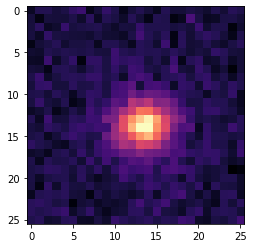

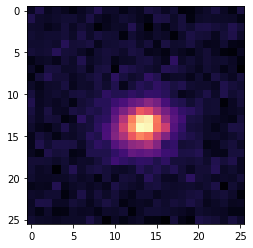

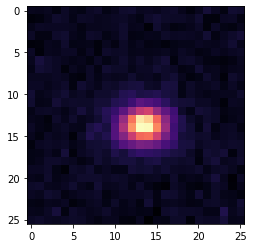

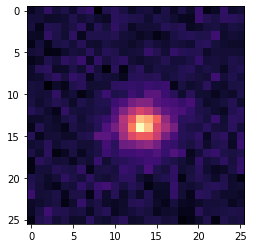

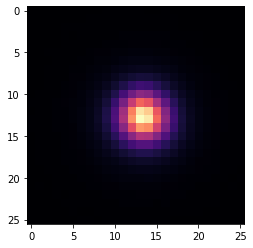

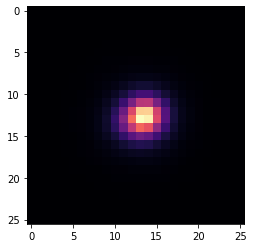

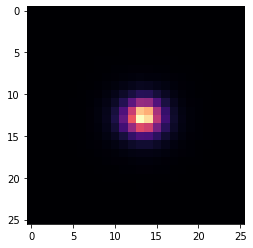

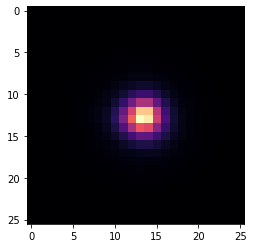

In [4]:
data = galstar_images.values
labels = galstar_labels.values

    
data_pre = data.reshape(31798,8,26,26)  #griz (psf-g, psf-r,psf-i,psf-z) 8 channels,they claim up to mag27 in the i band


for i in range(8):
    plt.imshow(data_pre[0,i,:,:],cmap='magma')
    plt.show()

## normalize image

In [5]:
vec_one_ = np.ones((26,26))

for i in tqdm(range(31798)):
    for j in range(8):
        
        
        data_pre[i,j,:,:] = data_pre[i,j,:,:]- np.amin(data_pre[i,j,:,:])*vec_one_  #background subtract
        data_pre[i,j,:,:] = data_pre[i,j,:,:] / np.max(data_pre[i,j,:,:])  #normalize between 0 and 1
        
        assert np.max(data_pre[i,j,:,:]) ==1 and np.min(data_pre[i,j,:,:]) ==0,'check normalization'


100%|██████████| 31798/31798 [00:22<00:00, 1414.95it/s]


In [6]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
import torchvision as tv
from torch.utils.data import DataLoader,TensorDataset
from torch import Tensor

if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

device = torch.device(device)
print(device)

cuda:0


## shuffle, transform to tensor

In [10]:
dataset = data_pre
train_label = labels.reshape(-1,1)



data_tensor = TensorDataset(Tensor(dataset),Tensor(train_label))
'''
train_loader = torch.utils.data.DataLoader(dataset = data_tensor,
                                          batch_size = 15899,
                                          shuffle = True,
                                        )
dataiter = iter(train_loader)
img,label = dataiter.next()
'''

'\ntrain_loader = torch.utils.data.DataLoader(dataset = data_tensor,\n                                          batch_size = 15899,\n                                          shuffle = True,\n                                        )\ndataiter = iter(train_loader)\nimg,label = dataiter.next()\n'

In [25]:
from torch.utils.data.sampler import SubsetRandomSampler

dataset_size = len(dataset)
print(dataset_size)
indices = list(range(dataset_size))
val_split = 0.01
split = int(np.floor(val_split*dataset_size))





if True:
    np.random.seed(42)
    np.random.shuffle(indices)
train_indices,val_indices = indices[split:],indices[:split]   





print(split)
train_indices,val_indices = indices[split:],indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset = data_tensor,batch_size = 15899,sampler = train_sampler)
val_loader = torch.utils.data.DataLoader(dataset = data_tensor,batch_size = 317,sampler = val_sampler)

31798
317


In [26]:
dataiter = iter(val_loader)
img,label = dataiter.next()

## Model

In [46]:
class BobNet(nn.Module):
    def __init__(self):
        super().__init__()        
        
        self.conv1 = nn.Conv2d(8,16,3,stride = 1,padding=0)#16,24x24 ()
        self.conv2 = nn.Conv2d(16,32,3,stride =1,padding = 0) #22x22,32#  batchnorm
        self.fc1 = nn.Linear(22*22*32,100)
        self.fc2 = nn.Linear(100,20) 
        self.fc3 = nn.Linear(20,1)
        
    def forward(self,x):
        x = torch.nn.functional.relu(self.conv1(x)) #leaky relu, elu
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.flatten(x,1)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x =  torch.sigmoid(self.fc3(x)) #binary, 0,1
        
        return x
model = BobNet().to(device)

In [47]:
from sklearn.metrics import accuracy_score
def eval(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred>0.5)
    return accuracy    

## train

In [48]:
criterion = nn.BCELoss() 


optimizer = torch.optim.Adam(model.parameters(),lr = 0.0002,weight_decay = 1e-5)

num_epochs = 600
output2 = []
Acc = []
Val=[]

for val_img,val_lab in val_loader:
    val_img,val_lab = val_img.to(device),val_lab.to(device)



for epoch in tqdm(range(num_epochs)):
    for img,lab in train_loader:
     
        
        img = img.to(device)
        lab= lab.to(device)
        
        out = model(img)
        
        val_out = model(val_img)
        valacc = eval(val_lab.cpu(),val_out.cpu())
        Val.append(valacc)
        acc = eval(lab.cpu(),out.cpu())
        

        Acc.append(acc)
        
        loss = criterion(out,lab)
        
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 40 ==0:
  
        print(f'Epoch:{epoch+1},train-acc: {acc*100:.5f}%,val-acc: {valacc*100:.5f}%')        
    
    
    output2.append(loss.item())

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch:1,train-acc: 58.54832%,val-acc: 63.40694%


  7%|▋         | 40/600 [02:53<40:34,  4.35s/it]

Epoch:41,train-acc: 95.84136%,val-acc: 95.26814%


 13%|█▎        | 80/600 [05:47<37:25,  4.32s/it]

Epoch:81,train-acc: 97.04788%,val-acc: 97.16088%


 20%|██        | 120/600 [08:40<34:44,  4.34s/it]

Epoch:121,train-acc: 97.40085%,val-acc: 97.79180%


 27%|██▋       | 160/600 [11:34<31:55,  4.35s/it]

Epoch:161,train-acc: 97.81158%,val-acc: 98.10726%


 33%|███▎      | 200/600 [14:27<28:48,  4.32s/it]

Epoch:201,train-acc: 97.93993%,val-acc: 98.10726%


 40%|████      | 240/600 [17:20<25:51,  4.31s/it]

Epoch:241,train-acc: 97.88217%,val-acc: 98.10726%


 47%|████▋     | 280/600 [20:11<22:46,  4.27s/it]

Epoch:281,train-acc: 97.87575%,val-acc: 97.79180%


 53%|█████▎    | 320/600 [23:01<19:51,  4.26s/it]

Epoch:321,train-acc: 98.08112%,val-acc: 98.10726%


 60%|██████    | 360/600 [25:52<17:01,  4.26s/it]

Epoch:361,train-acc: 98.28648%,val-acc: 98.10726%


 67%|██████▋   | 400/600 [28:42<14:12,  4.26s/it]

Epoch:401,train-acc: 98.31216%,val-acc: 98.42271%


 73%|███████▎  | 440/600 [31:33<11:21,  4.26s/it]

Epoch:441,train-acc: 98.29932%,val-acc: 98.42271%


 80%|████████  | 480/600 [34:24<08:33,  4.28s/it]

Epoch:481,train-acc: 98.45334%,val-acc: 98.42271%


 87%|████████▋ | 520/600 [37:14<05:42,  4.28s/it]

Epoch:521,train-acc: 98.37633%,val-acc: 98.42271%


 93%|█████████▎| 560/600 [40:09<02:54,  4.36s/it]

Epoch:561,train-acc: 98.54319%,val-acc: 98.73817%


100%|██████████| 600/600 [43:04<00:00,  4.31s/it]


In [50]:
print('best validation accuracy:',np.amax(Val))
print('best training accuracy:',np.amax(Acc))

best validation accuracy: 0.9873817034700315
best training accuracy: 0.9867916221145984


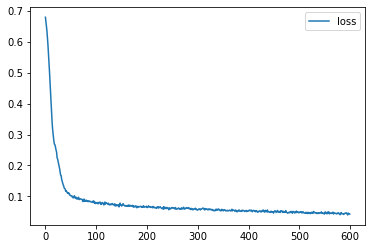

In [51]:
plt.plot(output2,label='loss')
plt.legend()

plt.show()

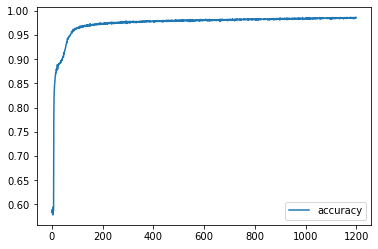

In [52]:
plt.plot(Acc,label = 'accuracy')
plt.legend()

In [53]:
y_prediction = out.detach().cpu().numpy()
np_y_pred = np.where(y_prediction < 0.5,0,1)
np_y_true = lab.cpu().numpy()

## F1 score

In [54]:
from sklearn.metrics import f1_score
f1_score(np_y_true,np_y_pred)

0.9838003838771594

## confusion matrix

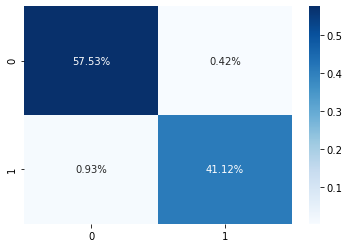

In [55]:

from sklearn.metrics import confusion_matrix
CFM = confusion_matrix(np_y_true,np_y_pred)

import seaborn as sns
sns.heatmap(CFM/np.sum(CFM),annot=True,fmt='.2%',cmap = 'Blues')

## AUC ,ROC

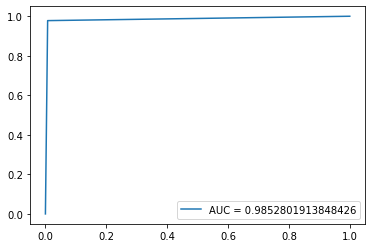

In [56]:
from sklearn.metrics import roc_auc_score,roc_curve

auc =roc_auc_score(np_y_true,np_y_pred)

fpr,tpr,__ = roc_curve(np_y_true,np_y_pred)
plt.plot(fpr,tpr,label = 'AUC = '+str(auc))
plt.legend(loc=4)
plt.show()